# Central Limit Theorem (CLT)

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats

## Skewned Distribution

Load data

In [35]:
cod_population = pd.read_csv("cod_population.csv")
cod_population.head(), cod_population["Cod_Weight"].mean()

(   Cod_Weight
 0   19.525484
 1   58.577148
 2    8.270952
 3   43.375040
 4   35.406281,
 np.float64(35.88832022394443))

Convert into numpy array

In [36]:
population = cod_population['Cod_Weight']
population[:5]

0    19.525484
1    58.577148
2     8.270952
3    43.375040
4    35.406281
Name: Cod_Weight, dtype: float64

Plot the data

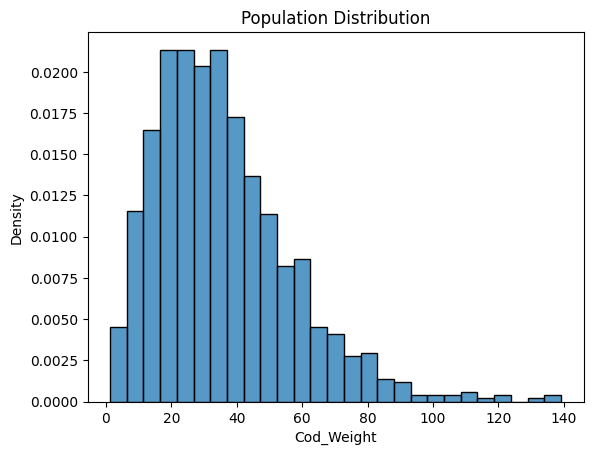

In [37]:
sns.histplot(population, stat = 'density' )
plt.title("Population Distribution")
plt.show()

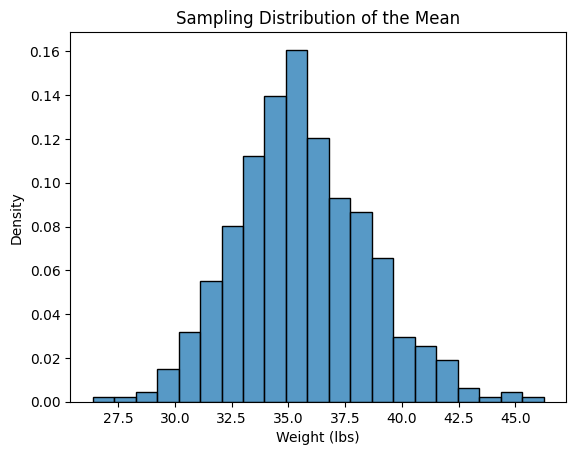

In [38]:
sample_means = []
samp_size = 50

for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    this_sample_mean = np.mean(samp)
    sample_means.append(this_sample_mean)

sns.histplot(sample_means, stat = 'density' )
plt.title("Sampling Distribution of the Mean")
plt.xlabel("Weight (lbs)")
plt.show()

In [39]:
def plot_hists(sample_sizes, population):
    n_sample_sizes = len(sample_sizes)
    fig_size = 5
    fig, axes = plt.subplots(1, n_sample_sizes, figsize=(fig_size*n_sample_sizes, fig_size))
    for i, n in enumerate(sample_sizes):
        sample_means = []
        for j in range(500):
            # choose n random data points (samples) from the population
            samp = np.random.choice(population, n, replace = False)
            this_sample_mean = np.mean(samp)
            sample_means.append(this_sample_mean)
        sns.histplot(sample_means, stat = 'density', ax=axes[i])
        axes[i].set_title(f"n = {n}")
        axes[i].set_xlabel("Weight (lbs)")
        axes[i].axvline(population.mean(), color='r', linestyle='--')
    plt.tight_layout()
    plt.show()

We choose different sample sizes and plot the sample means
- Lower sample sizes will show more the source data distribution
    - Thats because the skewness of the source data is high and the probability of choosing a sample thats on the side where the most data is, is high, exspecialy for lower sample sizes like 1.
- Higher sample sizes will show more the normal distribution
    - Thats because the skewness of the source data is high and the probability of choosing a sample thats on the side where the most data is also high, but we are choosign by far more samples than if we choose a lower sample size. So we have a higher chance, that we are also choosing sampels that are on the opposite side of the source data distribution.

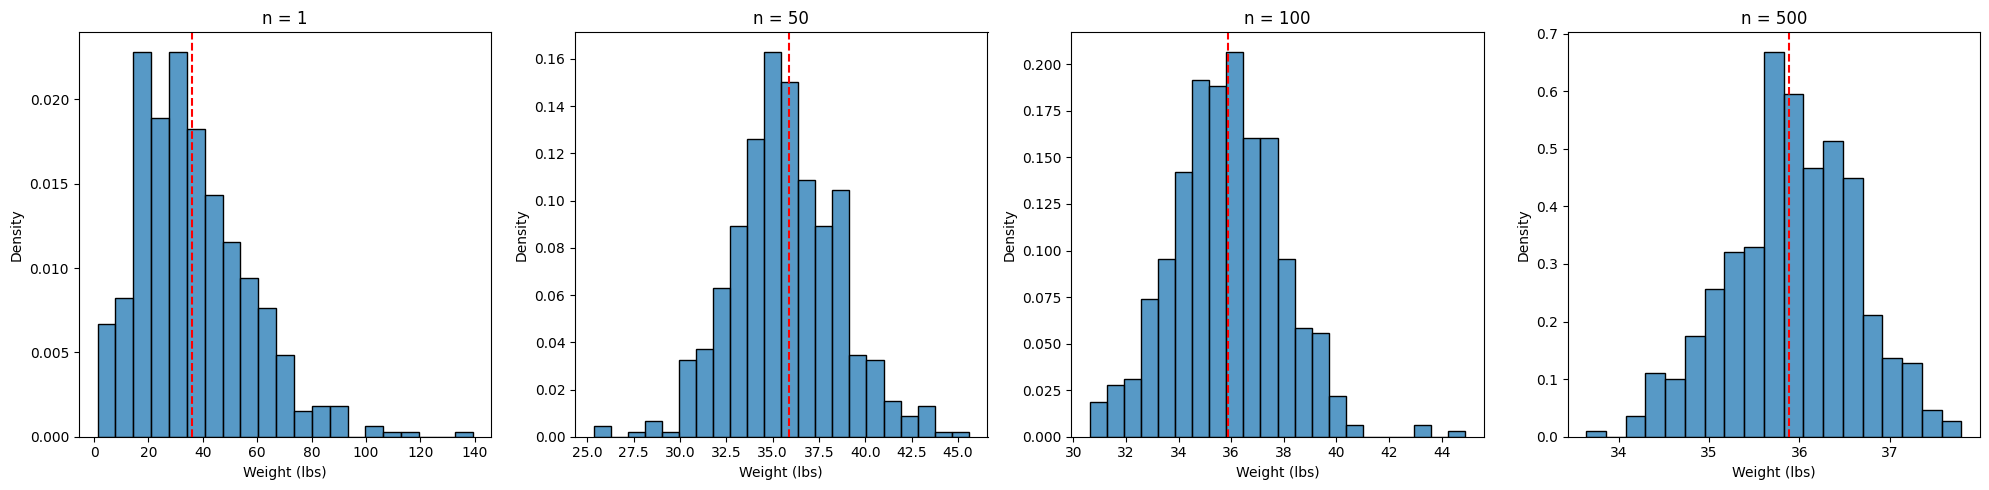

In [40]:
plot_hists([1, 50, 100, 500], population)

## Normal Distribution

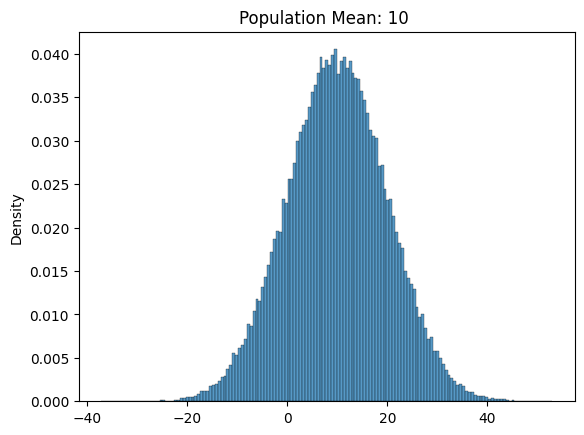

In [41]:
population_mean = 10
population_std_dev = 10

population = np.random.normal(population_mean, population_std_dev, size = 100_000)

sns.histplot(population, stat = 'density')
plt.title(f"Population Mean: {population_mean} ")
plt.xlabel("")
plt.show()

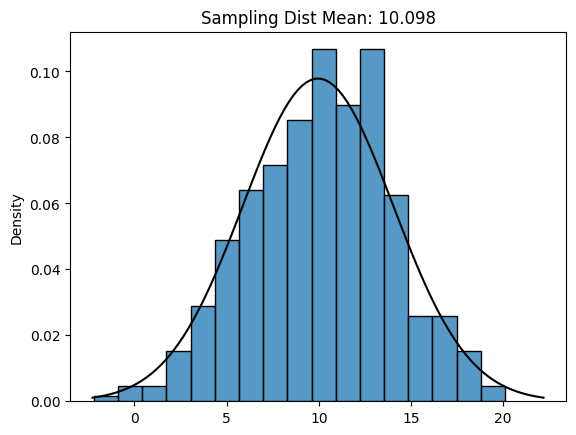

In [42]:
samp_size = 6
sample_means = []
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    sample_means.append(np.mean(samp))

mean_sampling_distribution = round(np.mean(sample_means), 3)

## Plot the sampling distribution
sns.histplot(sample_means, stat='density')
# calculate the mean and SE for the probability distribution
mu = np.mean(population)
sigma = np.std(population)/(samp_size**.5)
# plot the normal distribution with mu=popmean, sd=sd(pop)/sqrt(samp_size) on top
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.plot(x, stats.norm.pdf(x, mu, sigma), color='k', label = 'normal PDF')
plt.title(f"Sampling Dist Mean: {mean_sampling_distribution}")
plt.xlabel("")
plt.show()

In [43]:
def plot_hists_normal(sample_sizes, population):
    n_sample_sizes = len(sample_sizes)
    fig_size = 5
    fig, axes = plt.subplots(1, n_sample_sizes, figsize=(fig_size*n_sample_sizes, fig_size))
    for i, n in enumerate(sample_sizes):
        sample_means = []
        for j in range(500):
            samp = np.random.choice(population, n, replace = False)
            this_sample_mean = np.mean(samp)
            sample_means.append(this_sample_mean)
        sns.histplot(sample_means, stat = 'density', ax=axes[i])
        axes[i].set_title(f"n = {n}, mean = {round(np.mean(sample_means), 3)}")
        axes[i].set_xlabel("Weight (lbs)")
        mu = np.mean(population)
        sigma = np.std(population)/(n**.5)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        axes[i].plot(x, stats.norm.pdf(x, mu, sigma), color='k', label = 'normal PDF')
        axes[i].axvline(x=mu, color='r', linestyle='--', label = 'population mean')
    plt.tight_layout()
    plt.show()

As we can see, the distribution of the sample means are all normal distributions, no matter what sample size is, thats because the source distribution is normal distributed, so the sample size does not matter anymore.

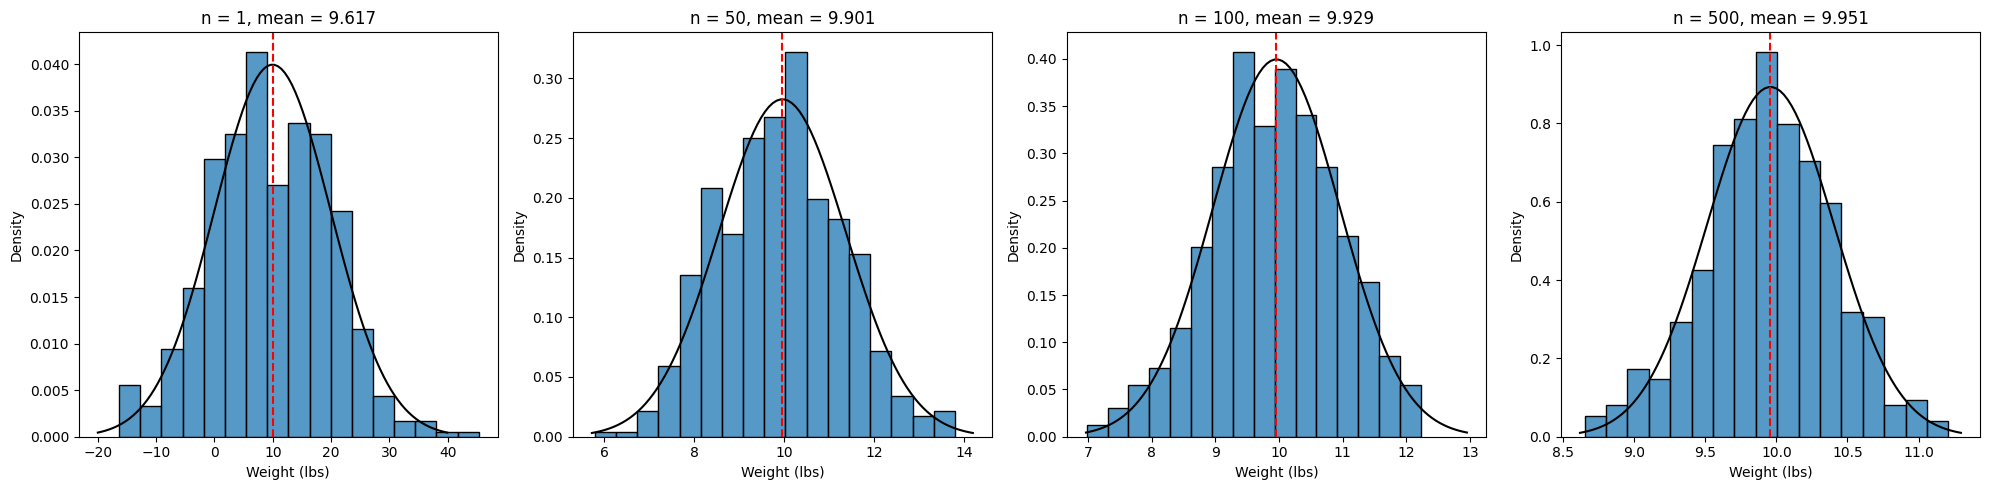

In [44]:
plot_hists_normal([1, 50, 100, 500], population)

So its important to know for the distribution:
- If we have a skewed source distribution:
    - **Sample size matters!**
        - If we have a small sample size the sample distribution will be skewed as well
        - If we have a large sample size the sample distribution will be normal distributed
        - The spread of the sample distribution will decrease with increasing sample size
- If we have a normal source distribution:
    - **Sample size does not matter!**
        - The sample distribution will always be normal distributed
    - **Sample size matters!**
        - The spread of the sample distribution will decrease with increasing sample size

## Standard Error

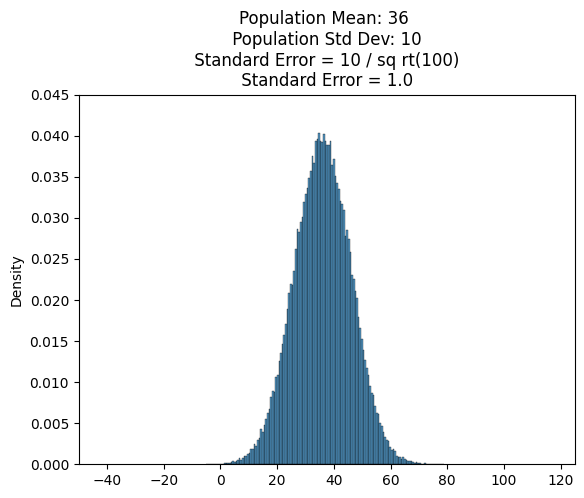

In [52]:
population_mean = 36
population_std_dev = 10
samp_size = 100

population = np.random.normal(population_mean, population_std_dev, size = 100000)
std_error = population_std_dev / (samp_size **0.5)

sns.histplot(population, stat = 'density')
plt.title(f"Population Mean: {population_mean} \n Population Std Dev: {population_std_dev} \n Standard Error = {population_std_dev} / sq rt({samp_size}) \n Standard Error = {std_error} ")
plt.xlim(-50,125)
plt.ylim(0,0.045)
plt.show()

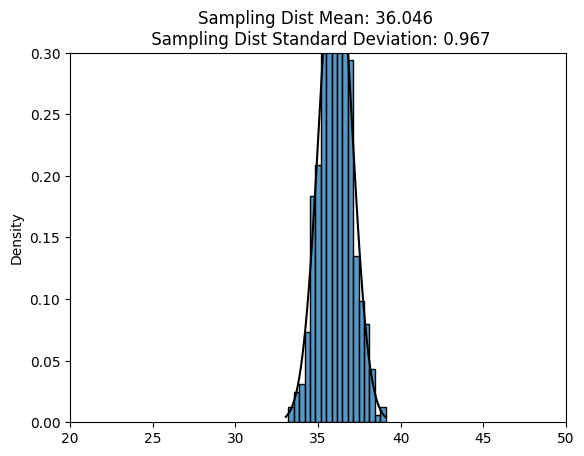

In [53]:
sample_means = []
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    sample_means.append(np.mean(samp))

mean_sampling_distribution = round(np.mean(sample_means),3)
std_sampling_distribution = round(np.std(sample_means), 3)

## Plot the sampling distribution
sns.histplot(sample_means, stat = 'density')
# calculate the mean and SE for the probability distribution
mu = np.mean(population)
sigma = np.std(population)/(samp_size**.5)

# plot the normal distribution with mu=popmean, sd=sd(pop)/sqrt(samp_size) on top
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='k', label = 'normal PDF')
# plt.axvline(mean_sampling_distribution,color='r',linestyle='dashed')
plt.title(f"Sampling Dist Mean: {mean_sampling_distribution} \n Sampling Dist Standard Deviation: {std_sampling_distribution}")
plt.xlim(20,50)
plt.ylim(0,0.3)
plt.show()

## Biased Estimators

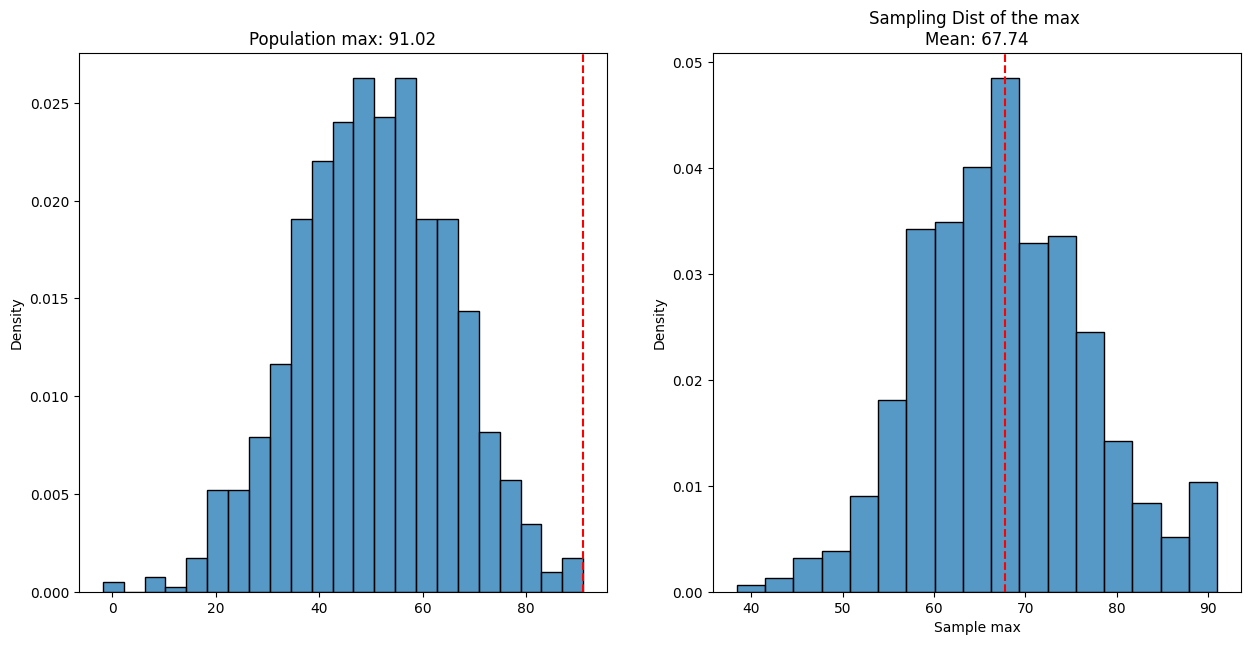

In [73]:
def app_statistic(x_name, x):
    if x_name == "mean":
        return np.mean(x)
    elif x_name == "median":
        return np.median(x)
    elif x_name == "max":
        return np.max(x)
    elif x_name == "min":
        return np.min(x)
    elif x_name == "var":
        return np.var(x)
    else:
        print("Invalid statistic")
        return np.mean(x)


### Below calculates the statistic for this population:
### You don't need to change anything below to pass the checkpoints
mean, std_dev = 50, 15
population = np.random.normal(mean, std_dev, 1000)

app_stat_text = "max"
pop_statistic = round(app_statistic(app_stat_text, population), 2)



sample_stats = []
samp_size = 5
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    this_sample_stat = app_statistic(app_stat_text, samp)
    sample_stats.append(this_sample_stat)



fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(population, stat = 'density', ax=axes[0])
axes[0].axvline(pop_statistic,color='r',linestyle='dashed')
axes[0].set_title(f"Population {app_stat_text}: {pop_statistic}")
axes[0].set_xlabel("")

sns.histplot(sample_stats, stat = 'density' , ax=axes[1])
axes[1].set_title(f"Sampling Dist of the {app_stat_text} \nMean: {round(np.mean(sample_stats),2)}")
axes[1].axvline(np.mean(sample_stats),color='r',linestyle='dashed')
axes[1].set_xlabel(f"Sample {app_stat_text}")


plt.show()

**Maximum Example**:  

- We have a source distribution and extract the max value that is for example 91.02
- We have a sample size for example of `5` and `500` samples
- For each sample we also extract the max value and save it in a list called `sample_stats`
- After the loop the list have 500 max values from each sample
- We plot the distribution of the max values and calculate the mean of the max values
- If the mean is not equal to the source distribution max value, the estimator is biased
- Otherwise the estimator is unbiased

**Unbiased Estimators**  

If the value of the population distribution is equal to the mean of the sample distribution, then the estimator is unbiased.
- For Example: 
    - If the mean value of the source distribution is 5 and the mean value of the sample distribution is 5, then the estimator is unbiased. We have seen it in the examples of above, where we viewed the difference between skewed and normal source distributions.

**Biased Estimators**

If the value of the population distribution is not equal to the mean of the sample distribution, then the estimator is biased.
- For Example: 
    - If the max value of the source distribution is 93.72 and the mean value of the sample distribution is 65.79, then the estimator is biased. See the example above.
